<a href="https://colab.research.google.com/github/simrandubey218/Marketing-Analytics-Hypothesis-Testing/blob/main/Facebook_Vs_AdWords_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

As a marketing agency our primary objectibve is to maximize the ROI for our clients' advertising campaigns.
We have conducted two ad capmgains one on Facebook and other on AdWords and we have to determine which platform yields better results in terms of clicks conversions and overall cost effectiveness.
By identifying the effective platform, we can allocate ouir resources more efficiently and optimize or advertising strategies to deliver better outcomes for our clients.

# Research Question

Which Ad Platform is better in terms of clicks, conversion and overall cost effectiveness?



In [25]:
# importing libraries

import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import numpy as np #mathematical operations
import scipy.stats as st
from sklearn.linear_model import LinearRegression #regression analysis
from sklearn.metrics import r2_score, mean_squared_error #for accuracy testing
from statsmodels.tsa.seasonal import seasonal_decompose #time series analysis
from statsmodels.tsa.stattools import coint #integration test
import warnings
warnings.filterwarnings('ignore')

#Data Description
The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.


Key features included in the dataset are as follows:

*   Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
*   Ad Views: The number of times the ad was viewed.
*   Ad Clicks: The number of clicks received on the ad.
*   Ad Conversions: The number of conversions resulting from the ad.
*   Cost per Ad: The cost associated with running the Facebook ad campaign.
*   Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
*   Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
*   Cost per Click (CPC): The average cost incurred per click on the ad.

In [26]:
# importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')

# reading data
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [27]:
# rows and columns count of the dataset
df.shape

(365, 17)

In [28]:
# datatypes of each columns
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [29]:
# converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [30]:
# descriptive stats of the campaigns (count,min,max,mean,std,25%,50%,75%)
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


In [31]:
# Sort by date, lowest at the top
df_sorted = df.sort_values(by='Date', ascending=True)
df_sorted.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,2019-01-02,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,2019-01-03,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,2019-01-04,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,2019-01-05,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


**Comparing Campaign Performance**

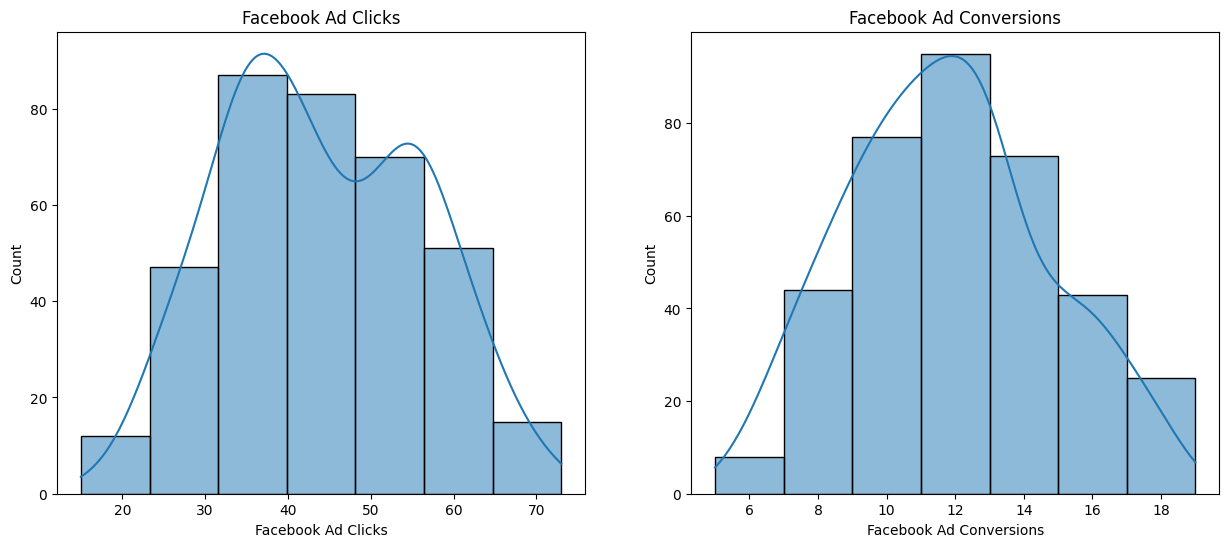

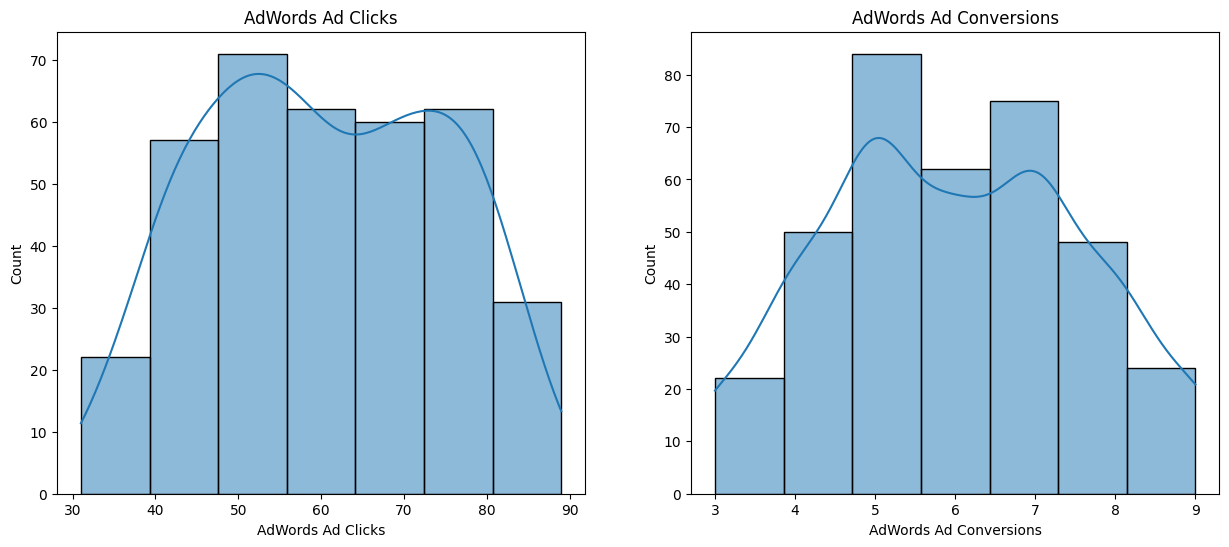

In [32]:
#Distribution of the clicks and conversions
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins =7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins =7, edgecolor='k', kde=True)
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins =7, edgecolor='k', kde=True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins =7, edgecolor='k', kde=True)
plt.show()

All the histograms have somewhat symmetrical shape. The symmetrical shape suggests that the number of clicks and conversions are relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high end or the low end of the data.

**How frequently do we observe days with high number of conversions compared to the days with low number of conversions**

In [33]:
# creating function to calculate the category for conversion
def create_conversion_cat (conversion_col):
  category = []
  for conversion in df[conversion_col]:
    if conversion < 6:
      category.append('Less than 6')
    elif 6 <= conversion < 11:
      category.append('6-10')
    elif 11 <= conversion < 16:
      category.append('10-15')
    else :
      category.append('More than 15')
  return category

# calling function of different campaign's conversions
df['Facebook Ad Conversions Category'] = create_conversion_cat('Facebook Ad Conversions')
df['AdWords Ad Conversions Category'] = create_conversion_cat('AdWords Ad Conversions')

df[['Facebook Ad Conversions', 'Facebook Ad Conversions Category', 'AdWords Ad Conversions', 'AdWords Ad Conversions Category']].head()

,Facebook Ad Conversions,Facebook Ad Conversions Category,AdWords Ad Conversions,AdWords Ad Conversions Category
0,8,6-10,5,Less than 6
1,12,10-15,6,6-10
2,8,6-10,4,Less than 6
3,9,6-10,5,Less than 6
4,7,6-10,7,6-10


In [34]:
#checking count of values (days) in each category
df['Facebook Ad Conversions Category'].value_counts()


,count
Facebook Ad Conversions Category,
10-15,189
6-10,128
More than 15,47
Less than 6,1


In [35]:
# creating a table of columns conversion category and count for Facebook and AdWords
Facebook = pd.DataFrame(df['Facebook Ad Conversions Category'].value_counts()).reset_index().rename(columns = {'Facebook Ad Conversions Category':'Category'})
AdWords = pd.DataFrame(df['AdWords Ad Conversions Category'].value_counts()).reset_index().rename(columns = {'AdWords Ad Conversions Category':'Category'})

Facebook, AdWords

(       Category  count
 0         10-15    189
 1          6-10    128
 2  More than 15     47
 3   Less than 6      1,
       Category  count
 0         6-10    209
 1  Less than 6    156)

In [36]:
# merging facebook and adowrds category tables and filling categories with no data as 0

category_df = pd.merge(Facebook, AdWords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10-15,189,0.0
1,6-10,128,209.0
2,Less than 6,1,156.0
3,More than 15,47,0.0


In [37]:
#rearranging the rows of category_df table
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
2,Less than 6,1,156.0
1,6-10,128,209.0
0,10-15,189,0.0
3,More than 15,47,0.0


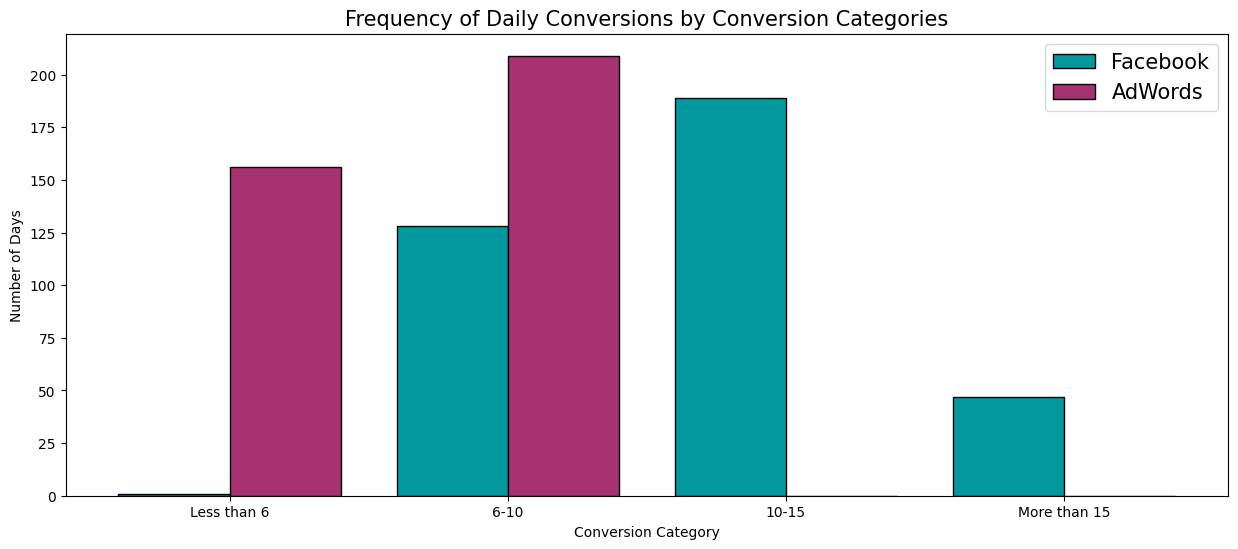

In [38]:
# plotting category_df table on a bar chart

# np.arange() helps in creating an array of sequence of numbers which will be used as positioning point for each of the bars
# here len(category_df) = 4 so np.arange() will return [0,1,2,3] which shall become reference positioning point for the bars
X_axis = np.arange(len(category_df))
plt.figure(figsize=(15,6))

plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords', color = '#A63272', linewidth = 1, edgecolor = 'k')

plt.xticks(X_axis,category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Frequency of Daily Conversions by Conversion Categories', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


* The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).

* There is a significant variance in the number of high-conversion days between two different campaigns.

* The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

**Is there a Correlation between Ad Clicks ans Sales? (A/B Test)**

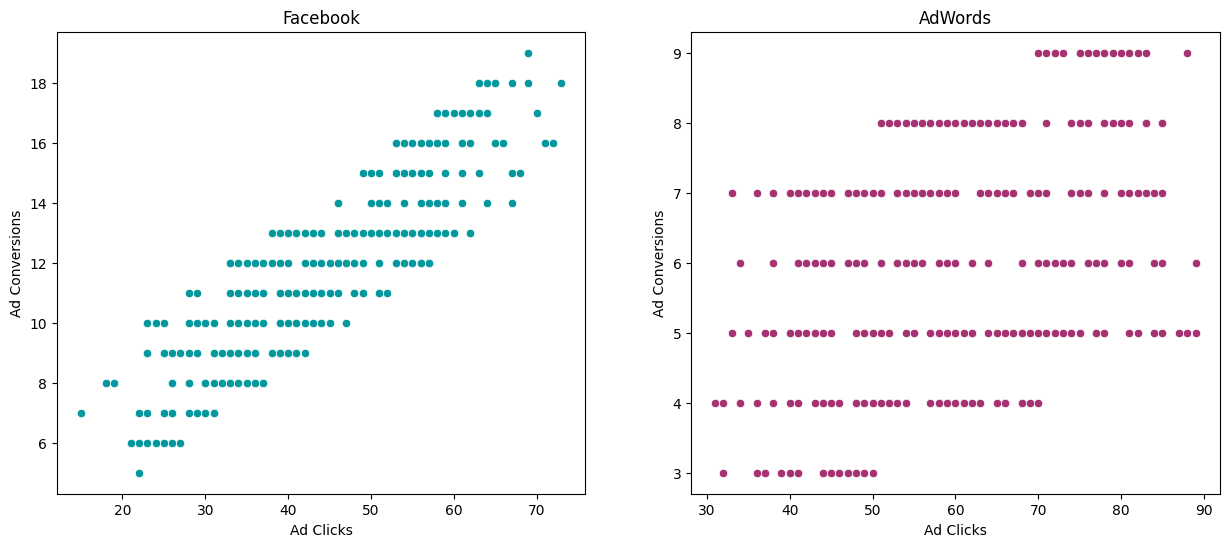

In [39]:
# plotting scatter charts to visualize the varianvce between Ad clicks and conversions

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = '#03989E')
plt.xlabel('Ad Clicks')
plt.ylabel('Ad Conversions')

plt.subplot(1,2,2)
plt.title("AdWords")
sns.scatterplot(x = df['AdWords Ad Clicks'], y = df['AdWords Ad Conversions'], color = '#A63272')
plt.xlabel('Ad Clicks')
plt.ylabel('Ad Conversions')
plt.show()


In [40]:
# calculating correlation coefficient
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()
facebook_corr, adwords_corr

(                         Facebook Ad Conversions  Facebook Ad Clicks
 Facebook Ad Conversions                 1.000000            0.873775
 Facebook Ad Clicks                      0.873775            1.000000,
                         AdWords Ad Conversions  AdWords Ad Clicks
 AdWords Ad Conversions                1.000000           0.447993
 AdWords Ad Clicks                     0.447993           1.000000)

In [41]:
# printing correlation coefficiet
print('Correlation Coeff \n------------')
print('Facebook: ', round(facebook_corr.values[0,1],2))
print('AdWords: ', round(adwords_corr.values[0,1],2))

Correlation Coeff 
------------
Facebook:  0.87
AdWords:  0.45


* A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tends to increase as well.

* This strong correlation suggests that Facebook ads are highly effective in driving sales as a large portion of the variation in sales can be explained by the variation in clicks on facebook ads.

* Since Facebook ads are highly effective in driving sales for the business, increasing the investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.

* A correlation coefficient of 0.45 indicates a moderate positive linear relationship between clicks and sales on Adwords. While there is still a positive relationahip, it is not as strong as in Facebook ads.

* The moderate correlation between clicks and sales on Adwords indicates that while Adwords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize the Adwords campaigns accordingly.

--------------------------

# Hypothesis Testing

**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on Adwords.

**Null Hypothesis (H0):** There is no diffrence in the number of conversions between Facebook and AdWords, or the humber of conversions from AdWords is greater than or equal to those from Facebook

H0: μ_Facebook <= μ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conmversions from AdWords.

H1: μ_Facebook > μ_AdWords

In [42]:
# Conducting a T-Test to confirm that the difference in mean of Facebook and AdWords conversion is not a coincidence.
# In a T-Test we calculate the ratio Signal/Noise (t_stats) and the P-Value
# The signal/noise ratio suggests whether the performance of two campaigns are very different or identical
# The P-value tells you the probability that the difference you see happened purely by luck.
# P < 0.05 indicates statistical evidence that facebook performed better than adwords while p > 0.05 suggests that the difference isn't strong enough to prove it wasn't just a coincidence.

print('Mean Conversion \n ---------')
print('Facebook', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords', round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b = df['AdWords Ad Conversions'], equal_var = False)
print('\n T Statistics', t_stats, '\n p-value', p_value)

if p_value < 0.05:
  print('\n p-value is less than the significance value, reject the null hypothesis')
else:
  print('\n p-value is greater tha the significance value, accept the null hypothesis')



Mean Conversion 
 ---------
Facebook 11.74
AdWords 5.98

 T Statistics 32.88402060758184 
 p-value 9.348918164530465e-134

 p-value is less than the significance value, reject the null hypothesis


**Test Results**

* The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.

* The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.

* The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.

* The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.

* Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.

* Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

**Regression Analysis**

What will happen when I do go with the facebook ads? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?


In [43]:
# independent variable
X = df[['Facebook Ad Clicks']]

# dependent variable
Y = df[['Facebook Ad Conversions']]

# initializing and fitting linear regression model
reg_model = LinearRegression()
reg_model.fit(X,Y)
prediction = reg_model.predict(X)

# model evaluation
r2 = r2_score(Y, prediction)*100
mse = mean_squared_error(Y, prediction)

print('Accuracy (R2 Score): ', round(r2,2), '%')
print('Mean Squared Error: ', round(mse,2))

Accuracy (R2 Score):  76.35 %
Mean Squared Error:  2.02


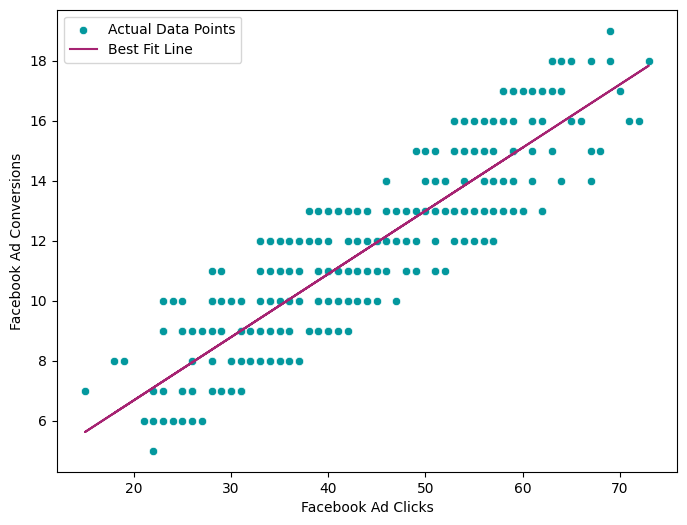

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'], y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual Data Points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label ='Best Fit Line')
plt.legend()
plt.show()

In [45]:
print(f'For {50} Clicks, Expected Conversion: {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion: {round(reg_model.predict([[80]])[0][0],2)}')

For 50 Clicks, Expected Conversion: 13.0
For 80 Clicks, Expected Conversion: 19.31


* The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

* With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

* For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

**Analyzing Facebook Campaign Metrics over period of time**

In [50]:
# data cleaning (removing unwanted characters from data and converting them to numberical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x:float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x:float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x:float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x:float(x[1:]))

TypeError: 'float' object is not subscriptable

In [51]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Ad Conversions Category,AdWords Ad Conversions Category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6-10,Less than 6
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,10-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6-10,Less than 6
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6-10,Less than 6
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6-10,6-10


In [52]:
df.dtypes

,0
Date,datetime64[ns]
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,float64
Facebook Click-Through Rate (Clicks / View),float64
Facebook Conversion Rate (Conversions / Clicks),float64
Facebook Cost per Click (Ad Cost / Clicks),float64
AdWords Ad Campaign,object


In [53]:
# filtering for facebook campaign

df = df [['Date', 'Facebook Ad Views', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
          'Facebook Click-Through Rate (Clicks / View)',
          'Facebook Conversion Rate (Conversions / Clicks)',
          'Facebook Cost per Click (Ad Cost / Clicks)']]

df.head()

,Date,Facebook Ad Views,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,7,78.0,1.10,47.59,5.38


**At What times of the month od days of the week do we obvserve conversions?**

In [54]:
# creating month and week column
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday

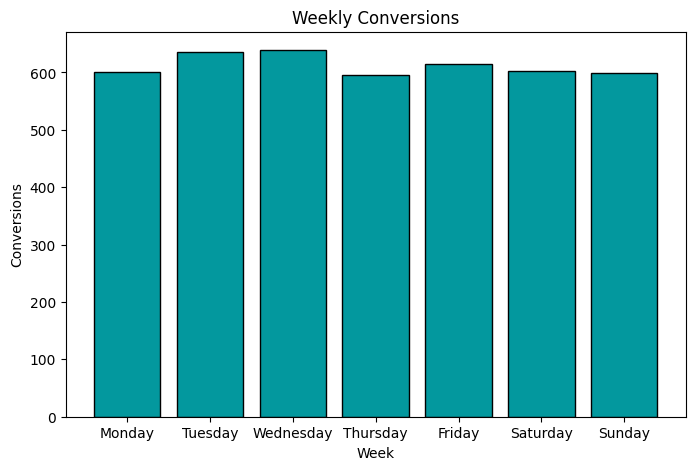

In [55]:
# Bar chart plot of weekly conversions
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversions =df.groupby('Week')[['Facebook Ad Conversions']].sum()
week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(week_names, weekly_conversions['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.xlabel('Week')
plt.ylabel('Conversions')
plt.show()

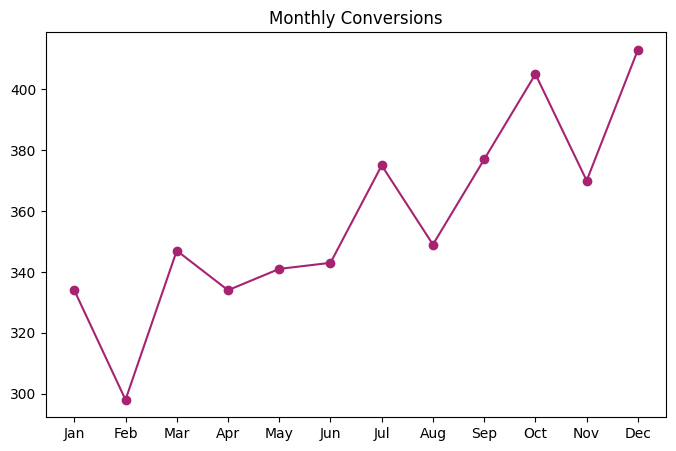

In [58]:
# Line chart plot for monthly conversions
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversions = df.groupby('Month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversions['Facebook Ad Conversions'], '-o', color = '#A62372')
plt.show()

* Across the weekdays over a year, the total number of conversion remains relatively consistent, indicating a consistent level of engagement througout the week. Mondays and Tuesdays consistently exhibit the highest conversion rates compared to the other days, suggesting that the beginning of the week sees hightened user engagement or responsiveness towards the marketing campaigns

* Examinig the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, some months stand out with variations in conversion rates. Feb, Apr, May, Jun, Aug and Nov experience a decline in conversions compared to the neigboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behaviour or adjustments in marketing strategies.

**How does the Cost per Conversion (CPC) trend over time?**

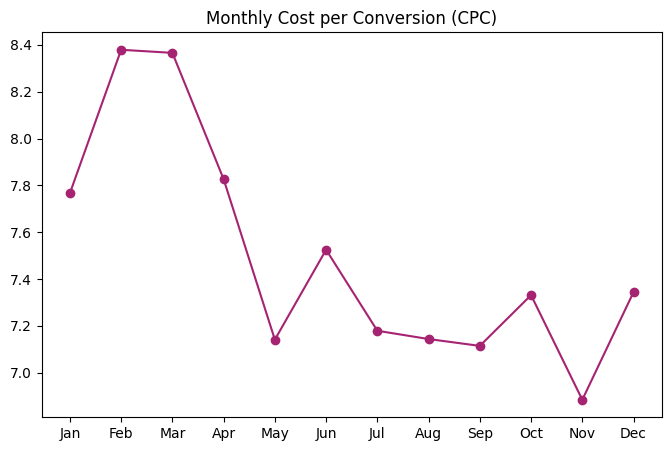

In [60]:
plt.figure(figsize=(8,5))
plt.title("Monthly Cost per Conversion (CPC)")
monthly_df = df.groupby('Month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad'] / monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color = '#A62372')
plt.show()

* The CPC trend shows fluctuation over the 12 month period but overall maintains a stable range

* May and Nov shows lowest CPC values, indicating potentially more cost effective advertising or higher conversion rates during these periods

* Feb has the highest CPC value, suggesting that the advertising costs maybe relatively higher during this month compared to others

* Lower CPC values in certain months like May and nov could indicate periods of higher marketing effectiveness or more favourable market conditions

* Consider allocating more advertising budget to months with historically lower CPC values to maximize ROI

**Is there a long term equilibrium realtionship between advertising spends and conversion rates that suggests a stable proportional impact of budget changes on conversion over time?**



In [62]:
# cointegration test
# Null Hypothesis (H0): There is no long term equilibrium between advertising spends and conversion rates
# Alternate Hypothesis (H1): Long term equilibrium is present between the advertising spends and conversion rates

score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration Test Score: ', score)
print('p-value: ', p_value)

if p_value < 0.05:
  print('\n p-value is less than the significance value, reject the null hypothesis')
else:
  print('\n p-value is greater tha the significance value, accept the null hypothesis')

Cointegration Test Score:  -14.755428385103219
p-value:  2.1337375979061323e-26

 p-value is less than the significance value, reject the null hypothesis


* Since p-value is significantly less than the significance level, we reject the null hypothesis. This indicates that there is a long term equilibrium relationship between the advertising spend (cost) and conversions

* Buisnesses can use this understanding of the stable relationship between cost and conversions to optimize their marketing strategies. By investing in campaigns that demonstrate a strong ROI and adjusting spend based on performance, companies can maximize conversions while minimizing the spends